in this project we are going to analyse an available dataset and predict another dataset according to first dataset

to reach our goal, we need to analyse data, to be more specific we must read and save date, then extract useful information and model our goal(normalize and PDF function in this case), then according to extracted information and statistics, we predict another, two method of predictions(1-density and 2-possibility) are explained and pros and cons will be shown. 

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29825 entries, 0 to 29824
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29825 non-null  int64 
 1   workclass       28154 non-null  object
 2   fnlwgt          29825 non-null  int64 
 3   education       29825 non-null  object
 4   education-num   29825 non-null  int64 
 5   marital-status  29825 non-null  object
 6   occupation      28149 non-null  object
 7   relationship    29825 non-null  object
 8   race            29825 non-null  object
 9   sex             29825 non-null  object
 10  capital-gain    29825 non-null  int64 
 11  capital-loss    29825 non-null  int64 
 12  hours-per-week  29825 non-null  int64 
 13  native-country  29288 non-null  object
 14  salary          29825 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.4+ MB


- `info()` method provides brief information of a dataframe, like column names and their data types, number of non-null values and memory usage.

In [110]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,29825.000000,2.982500e+04,29825.000000,29825.000000,29825.000000,29825.000000
mean,38.581425,1.897389e+05,10.079229,1094.586052,86.476513,40.434334
std,13.652005,1.053738e+05,2.571678,7485.908646,401.195078,12.308174
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178490e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.785170e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.368790e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


- `describe()['col_name']` method provides statistic information of a numeric column (or all numeric columns if you don't write []) such as mean,standard division, min, max and quarters. 

In [111]:
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [112]:
df.tail(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
29822,47,Local-gov,191389,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,35,United-States,<=50K
29823,38,Private,187983,Prof-school,15,Married-civ-spouse,Sales,Wife,White,Female,0,0,40,United-States,<=50K
29824,18,Private,215110,HS-grad,9,Never-married,Handlers-cleaners,Own-child,Black,Male,0,0,40,United-States,<=50K


- `head(n)` and `tail(n)` methods display first and last n rows\
- it is good to use this methods to briefly know the data set specially in large dataset

In [113]:
for col in df.columns:
    df[col].fillna(df[col].mode()[0],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29825 entries, 0 to 29824
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29825 non-null  int64 
 1   workclass       29825 non-null  object
 2   fnlwgt          29825 non-null  int64 
 3   education       29825 non-null  object
 4   education-num   29825 non-null  int64 
 5   marital-status  29825 non-null  object
 6   occupation      29825 non-null  object
 7   relationship    29825 non-null  object
 8   race            29825 non-null  object
 9   sex             29825 non-null  object
 10  capital-gain    29825 non-null  int64 
 11  capital-loss    29825 non-null  int64 
 12  hours-per-week  29825 non-null  int64 
 13  native-country  29825 non-null  object
 14  salary          29825 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.4+ MB


as we see, thre is no more NaNs and all columns have 29825 non-null data.


first we replace NaNs before label encoding, because label encode of NaN is equall to -1 but we don't want that to happen.
reasons of using mode instead of mean:
- many column's type are object, mean of objects make no sense for analyzing(even if they are encoded)
- we have some discrete integer parameters, mean is good for continious variables.

pros of filling NaNs with mean:
- it is quick and easy way to handle missing data.
- it prevent statistical mistakes
- improves accuracy of analyse by removing missing data.

cons of mean:
- not working for discrete numbers or non-numberic data
- not a robust way if we have so many outlier data
- it bias data to mean, specially if we have so many NaNs.
- it makes data homogeneous.



In [114]:
original_df = df.copy(deep=True) #save original dataframe, later reason will be explained
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category').cat.codes
df.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
count,29825.000000,29825.000000,2.982500e+04,29825.000000,29825.000000,29825.000000,29825.000000,29825.000000,29825.000000,29825.000000,29825.000000,29825.000000,29825.000000,29825.000000,29825.000000
mean,38.581425,3.095624,1.897389e+05,10.300218,10.079229,2.614283,6.131299,1.446538,3.665884,0.669103,1094.586052,86.476513,40.434334,36.417603,0.239866
std,13.652005,1.107477,1.053738e+05,3.865799,2.571678,1.508745,3.977715,1.605059,0.848849,0.470544,7485.908646,401.195078,12.308174,6.057330,0.427009
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178490e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.785170e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.368790e+05,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


- cat.codes only works with 'category' data type, so we change every column type to category and then encode them to a number
- category is a date type which assign a number to each unique data 

In [115]:
original_df['salary'].astype('category').cat.categories[1]

'>50K'

- by using this syntax we can see each code of encoded dataframe refers to which object in original dataframe

In [116]:
for col in df.columns:
    print(col,':',df[col].nunique())

age : 72
workclass : 8
fnlwgt : 20337
education : 16
education-num : 16
marital-status : 7
occupation : 14
relationship : 6
race : 5
sex : 2
capital-gain : 118
capital-loss : 91
hours-per-week : 94
native-country : 41
salary : 2


- as we see, fnlwgt is almost unique for every row, so it doesn't provide any useful information for analyses, thus we delete it:

In [117]:
df = df.drop('fnlwgt',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29825 entries, 0 to 29824
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             29825 non-null  int64
 1   workclass       29825 non-null  int8 
 2   education       29825 non-null  int8 
 3   education-num   29825 non-null  int64
 4   marital-status  29825 non-null  int8 
 5   occupation      29825 non-null  int8 
 6   relationship    29825 non-null  int8 
 7   race            29825 non-null  int8 
 8   sex             29825 non-null  int8 
 9   capital-gain    29825 non-null  int64
 10  capital-loss    29825 non-null  int64
 11  hours-per-week  29825 non-null  int64
 12  native-country  29825 non-null  int8 
 13  salary          29825 non-null  int8 
dtypes: int64(5), int8(9)
memory usage: 1.4 MB


- as we see there is no more fnlwgt column

In [118]:
original_df['sex'].count()

29825

In [119]:
original_df['sex'].value_counts()

Male      19956
Female     9869
Name: sex, dtype: int64

In [120]:
len(original_df[(original_df['race']=='Black') & (df['age'] > 30)])

1906

In [121]:
original_df[original_df['education'] == 'Bachelors']['hours-per-week'].mean()

42.546669366268475

In [122]:
n = 0
sum = 0
for index, row in original_df.iterrows():
    if(row['education'] == 'Bachelors'):
        sum += row['hours-per-week']
        n += 1
sum/n

42.546669366268475

- time difference is completely visible, consider that it is just about 30'000 rows, in larger dataset using loop instead of vectorization is too slow.

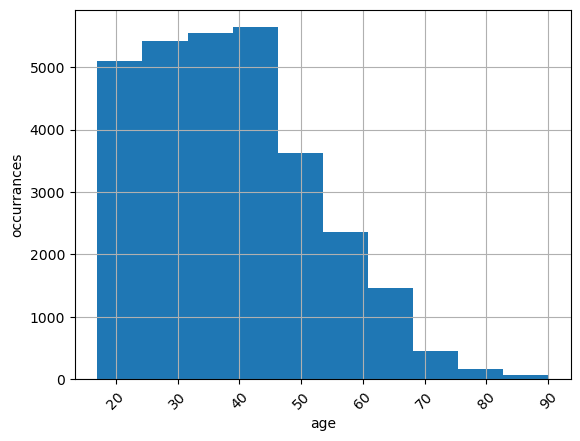

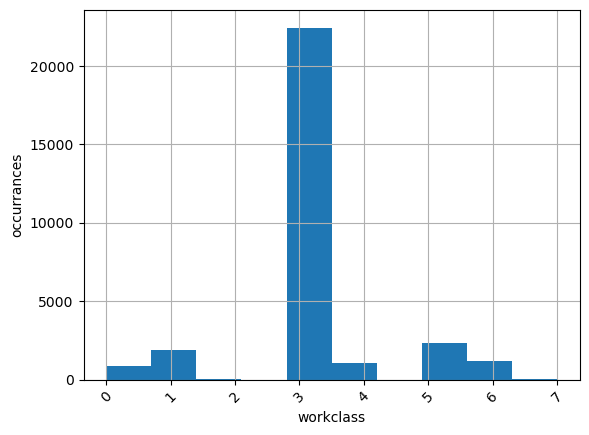

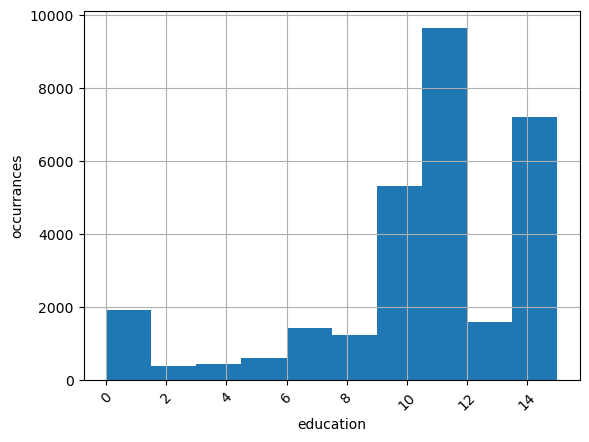

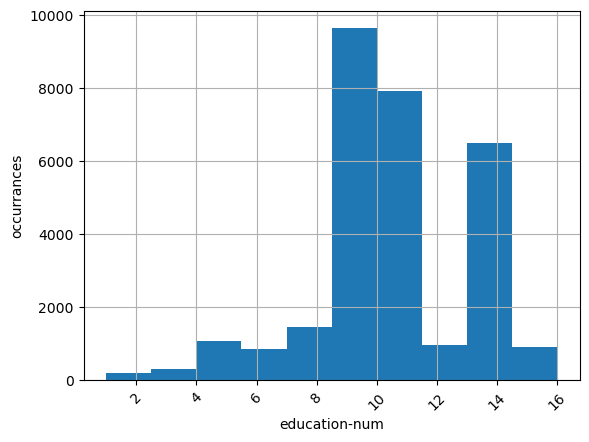

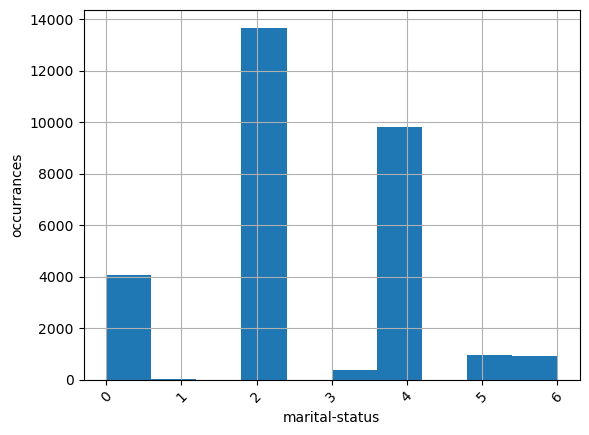

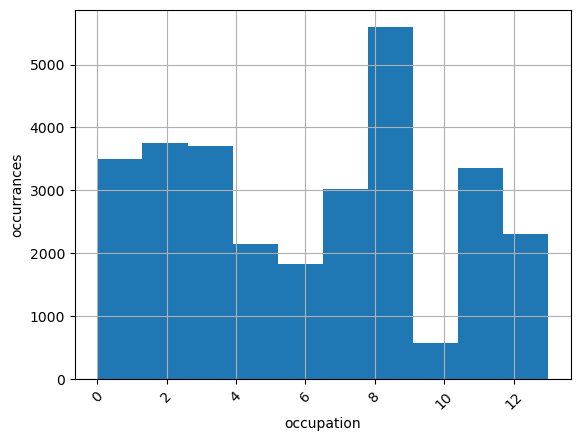

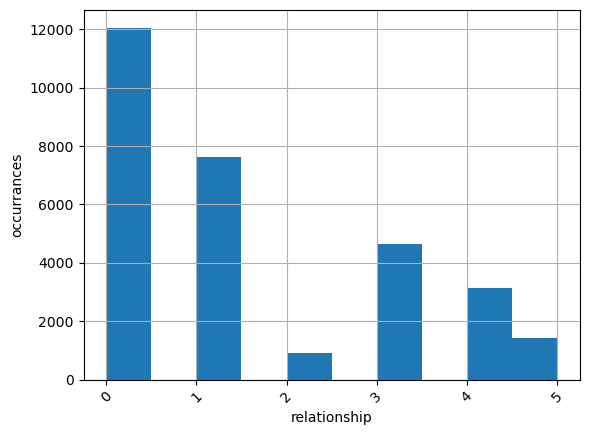

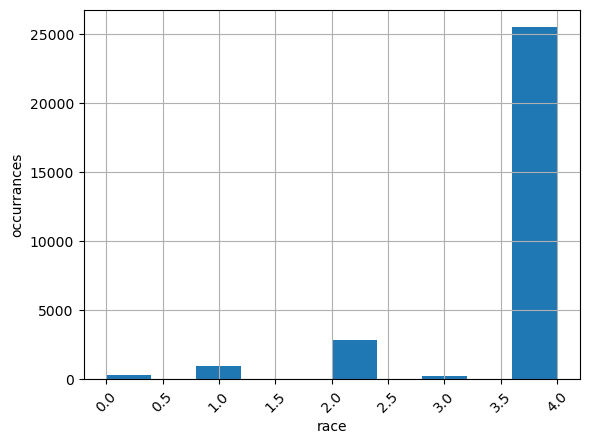

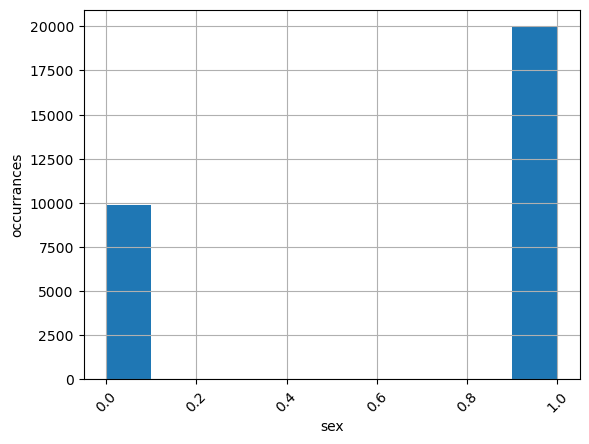

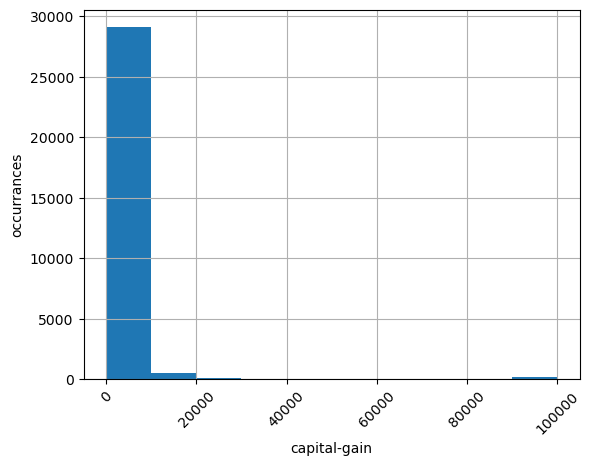

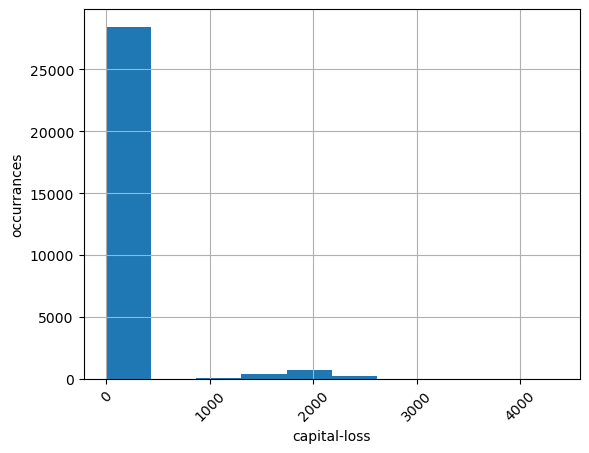

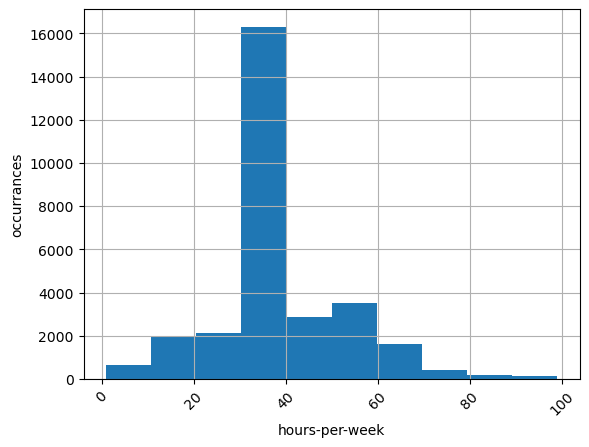

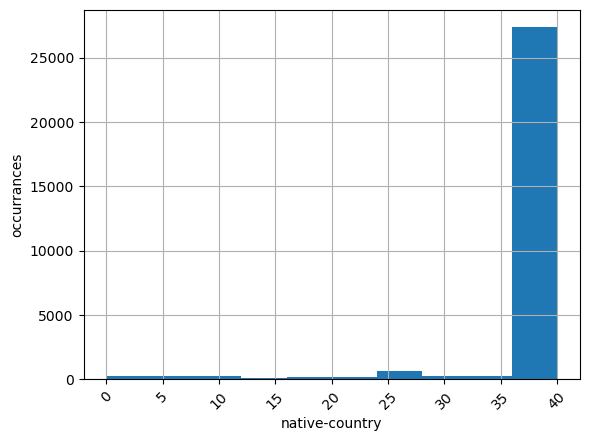

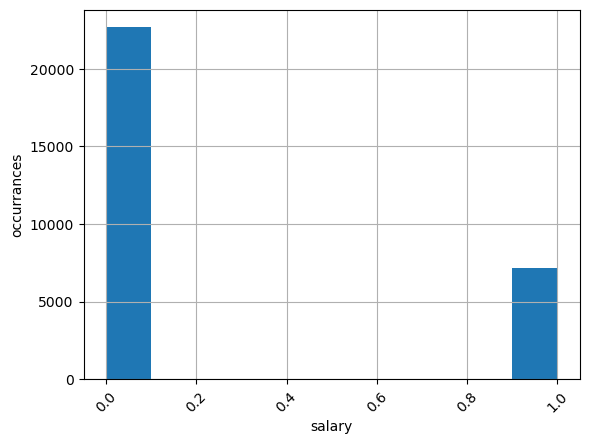

In [123]:
for col in df.columns:
    df[col].hist()
    plt.xlabel(col)
    plt.xticks(rotation = 45)
    plt.ylabel('occurrances')
    plt.show()
    

In [124]:
norm_df = pd.DataFrame()
for col in df.columns:
    mean = df[col].mean()
    std = df[col].std()
    norm_df[col] = df[col].apply(lambda x: (x-mean)/std)
    

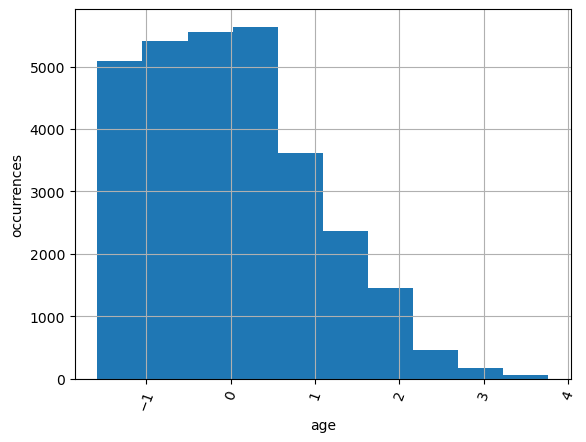

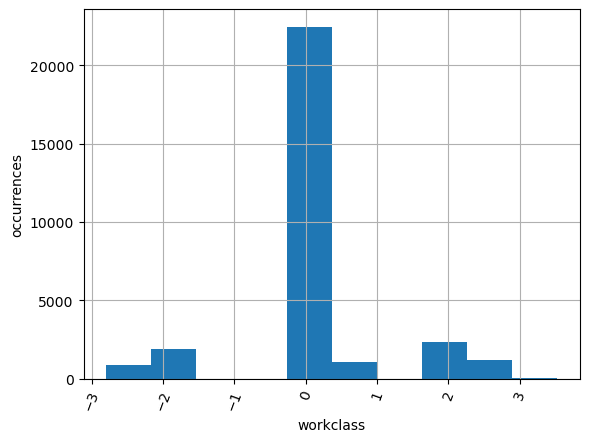

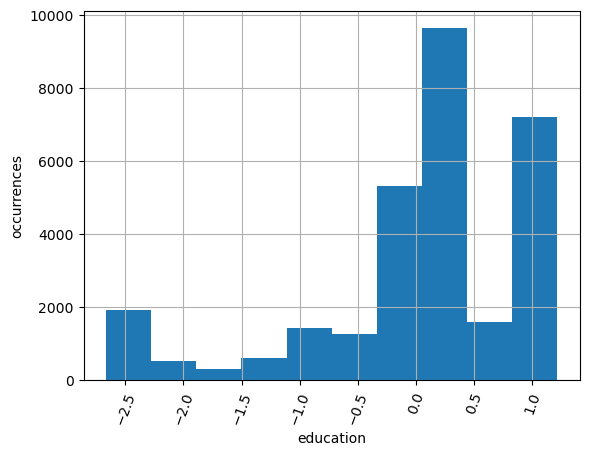

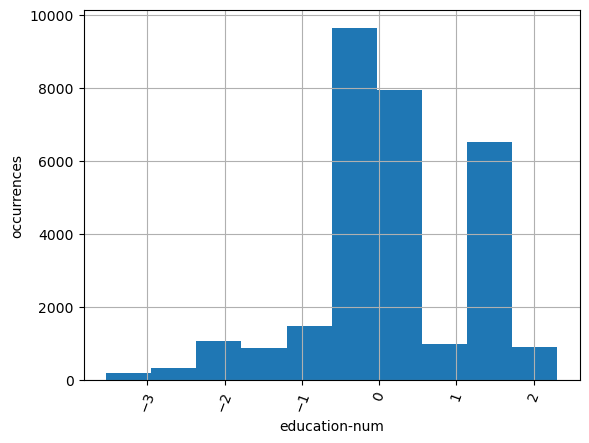

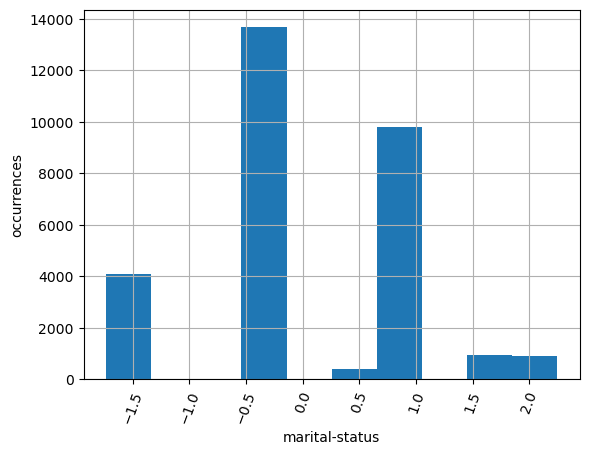

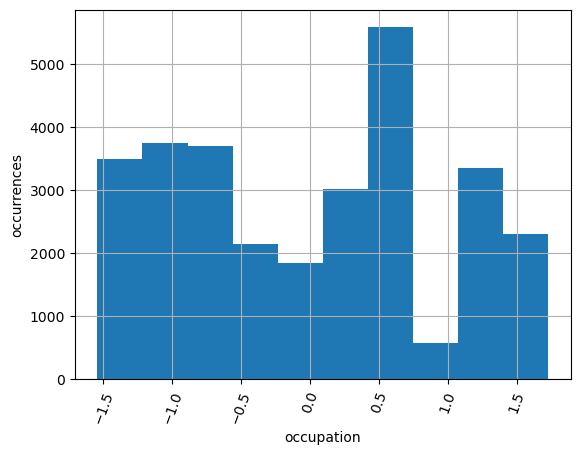

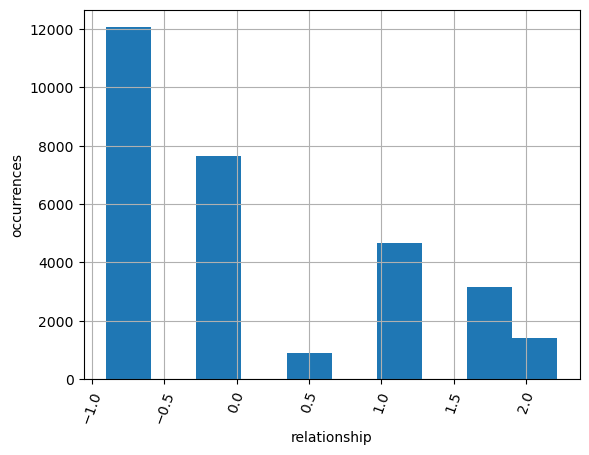

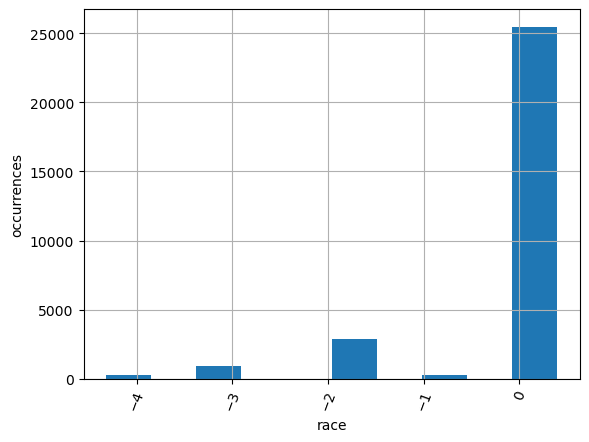

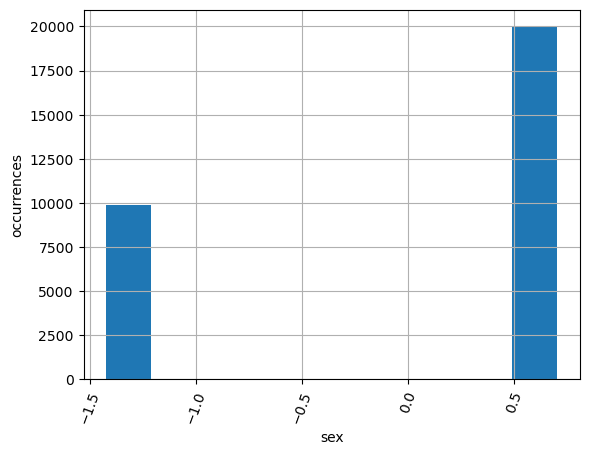

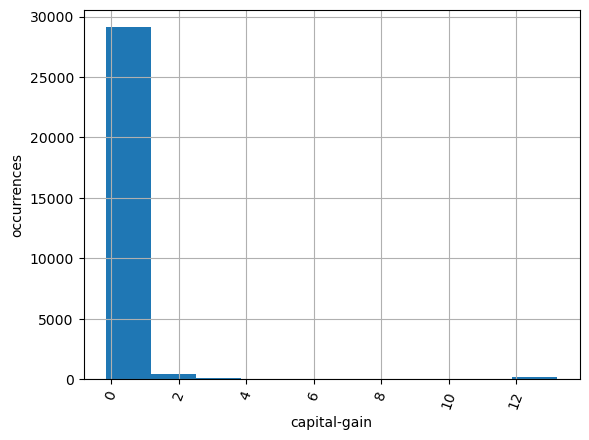

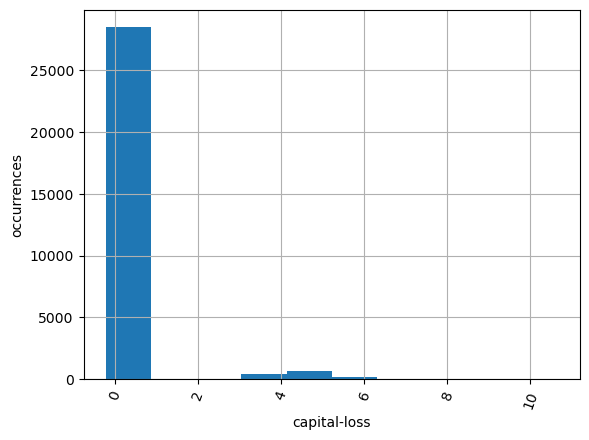

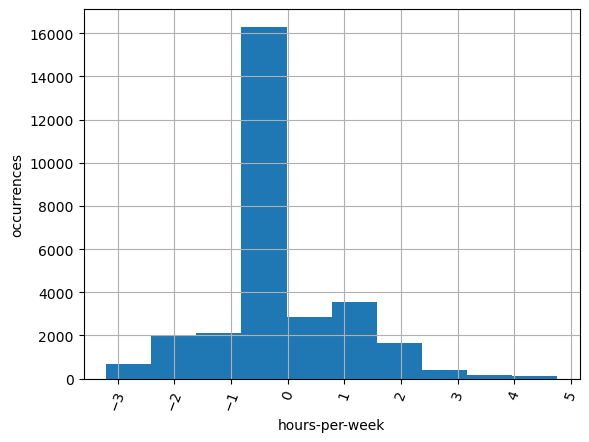

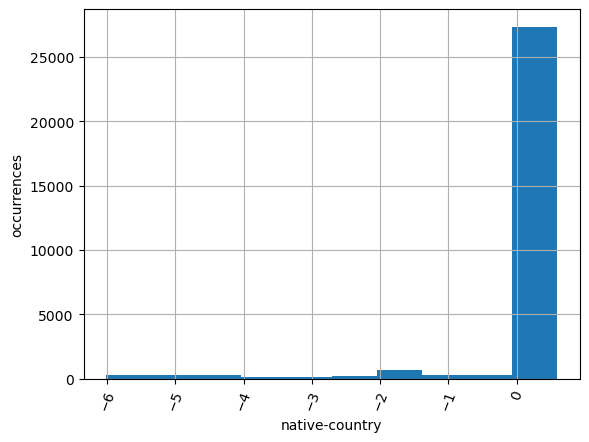

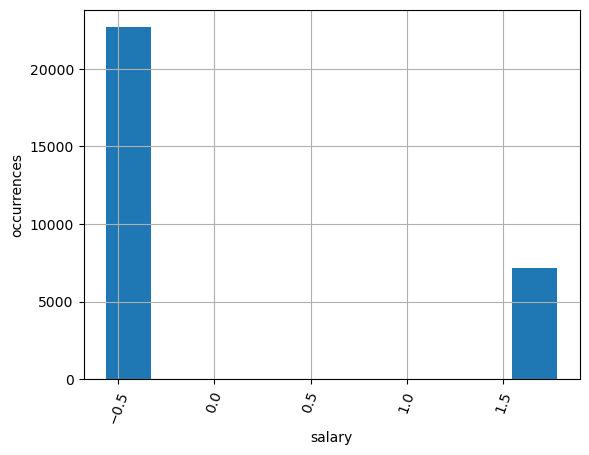

In [125]:
for col in norm_df.columns:
    norm_df[col].hist()
    plt.xlabel(col)
    plt.xticks(rotation = 70)
    plt.ylabel('occurrences')
    plt.show()
    

- we normalized the data by substracting mean and deviding by standard deviation.
- take note each column has its own mean and std.

to show pdf:
- first we choose >50 salary(index = 0), then I delete salary because it is useless.(all salary are same type, does not provide information)
- then we normalize the data, and find min and max, they are used in plotting.
- then we draw pdf from min to max.(involves all data)

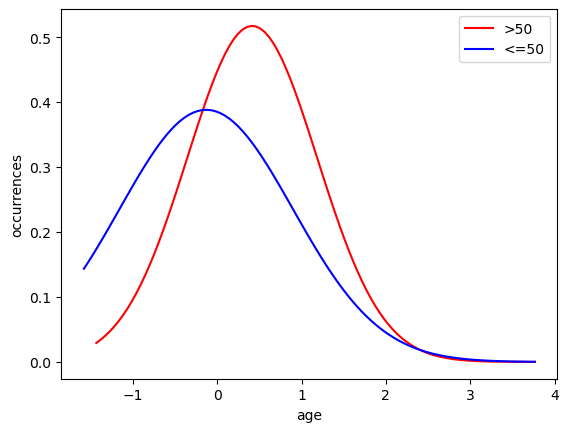

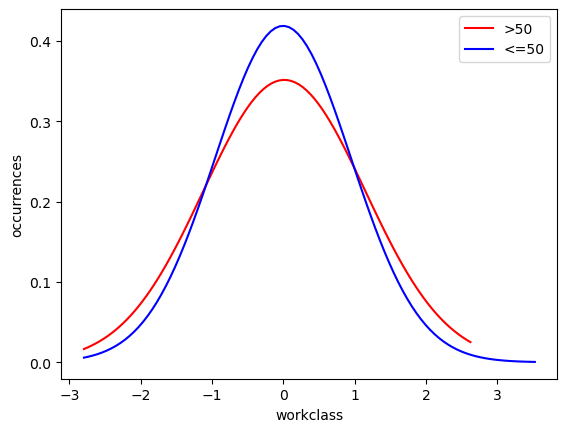

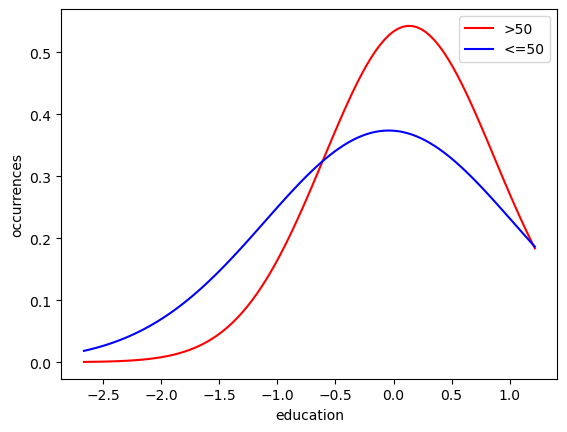

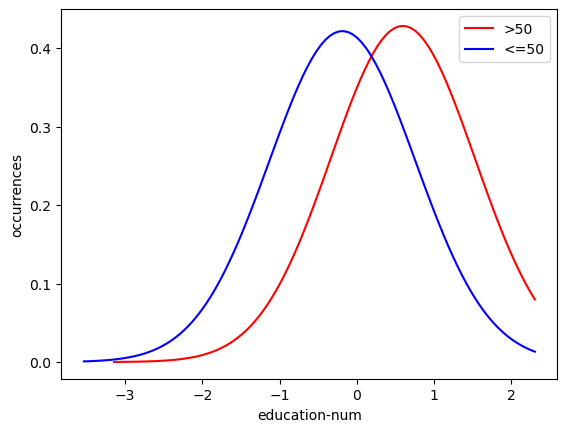

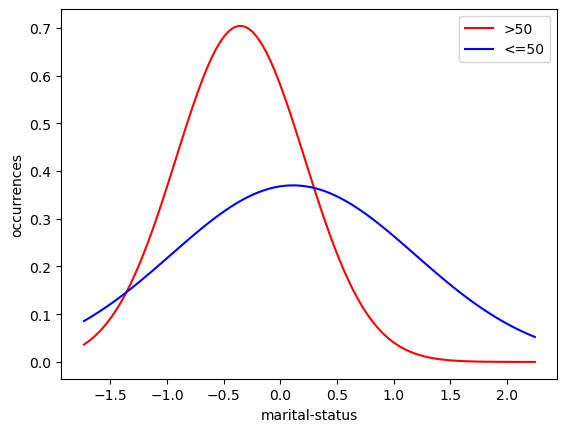

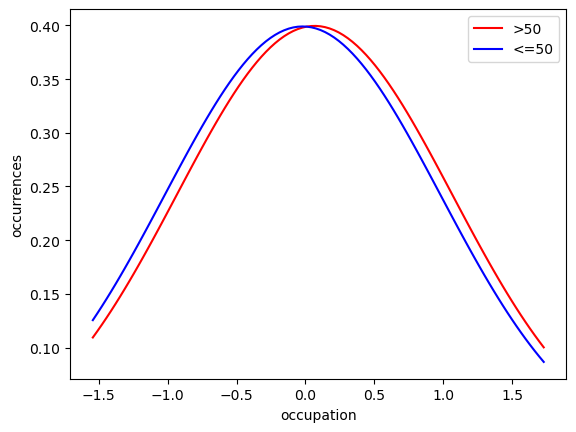

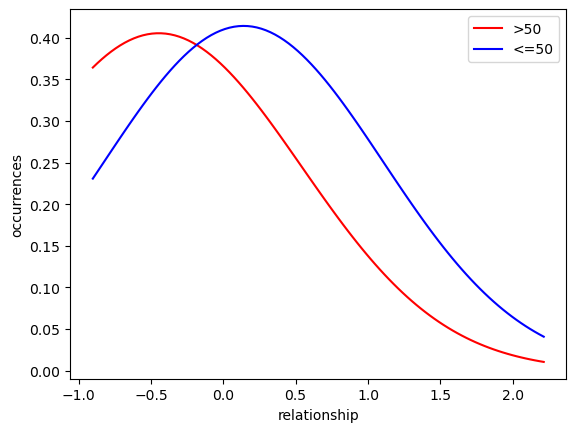

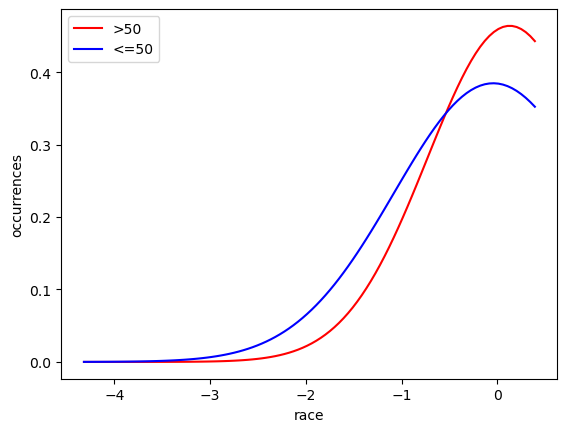

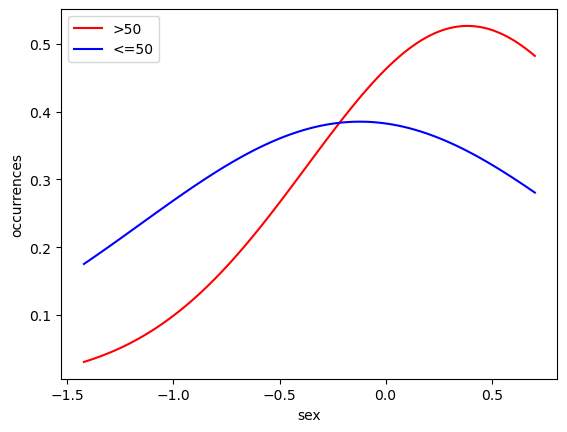

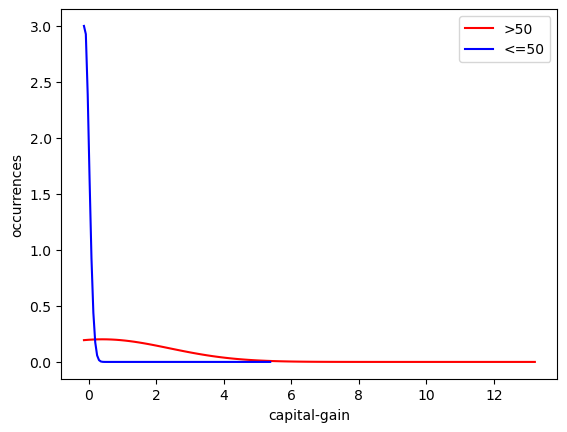

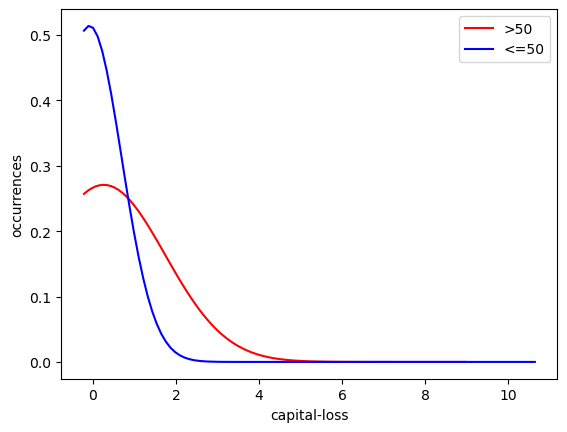

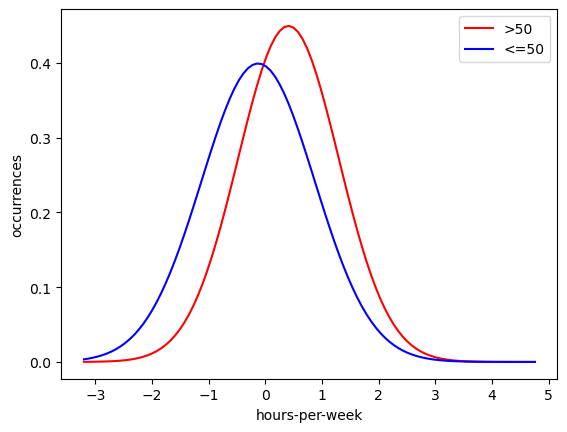

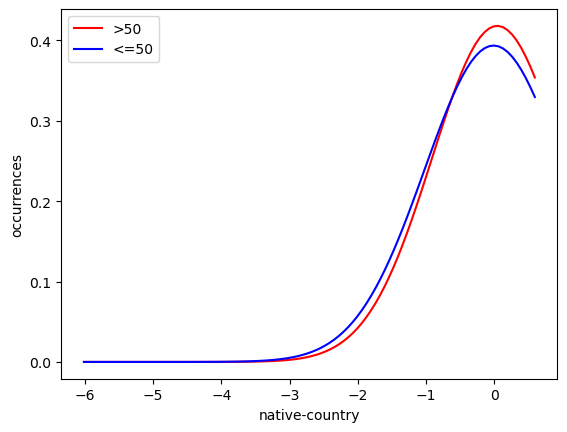

In [126]:
import scipy.stats as st
high_salary = norm_df[df['salary'] == 1]
high_salary = high_salary.drop('salary',axis=1)

low_salary = norm_df[df['salary'] == 0]
low_salary = low_salary.drop('salary',axis=1)

for col in high_salary.columns:
    mean_high = high_salary[col].mean()
    std_high = high_salary[col].std()
    min_high = high_salary[col].min()
    max_high = high_salary[col].max()
    
    
    mean_low = low_salary[col].mean()
    std_low = low_salary[col].std()
    min_low = low_salary[col].min()
    max_low = low_salary[col].max()
    
    norm_high = st.norm(mean_high,std_high)
    norm_low = st.norm(mean_low,std_low)
    
    x_high = np.linspace(min_high, max_high, num=100)
    x_low = np.linspace(min_low, max_low, num=100)
    
    pdf_high = norm_high.pdf(x_high)
    pdf_low = norm_low.pdf(x_low)
    
    plt.plot(x_high,pdf_high,color = 'r', label = '>50')
    plt.plot(x_low,pdf_low,color = 'b', label ='<=50')
    plt.legend()
    plt.xlabel(col)
    plt.ylabel("occurrences")
    
    plt.show()

    

Now to analyse data:
- overlapping is not good! the more pdfs have overlap, the less they can be used to predict, because it means our goal(salary) depends in a same way to that variable
- we can see capital-gain is good to be use in prediction
- I used two ways of prediction, as we will see first one is depends on mean and std and interval of this two, it ends not as we wanted! The reasons will be explained
- the second one is prediction according to pdf and possibility. it is slightly visible that this is a better prediction comparing to first one

First method:
- using numeric variables and calculating mean and std of >50k salary.
- if a value is in [mean - std×ratio , mean + std×ration] will be considered as >50k salary and if not it will be considered as <=50k, ratio and variables can be changed and be experimented to see the result, methods(columns) and ratio are defined and can be saw in the next two lines:

In [127]:
methods = ['age','education-num','capital-gain','capital-loss','hours-per-week']
ratio = [1/2,1,2]

for method in methods:
    print(method,end=" : ")
    for x in ratio: 
        mean = high_salary[method].mean()
        std = high_salary[method].std()
        df['predict'] = ((norm_df[method] > mean-std*x) & (norm_df[method] < mean+std*x))

        a = df.groupby(['predict','salary']).size()
        print((a[False,0] + a[True,1])/a.sum(),end=" - ")
    print("")




age : 0.6942497904442582 - 0.6268566638725901 - 0.4062699077954736 - 
education-num : 0.7232858340318524 - 0.5603688181056161 - 0.3115507124895222 - 
capital-gain : 0.21823973176865047 - 0.2323889354568315 - 0.23507124895222128 - 
capital-loss : 0.23932942162615256 - 0.23896060352053647 - 0.23808885163453478 - 
hours-per-week : 0.45247275775356244 - 0.4032858340318525 - 0.3278457669740151 - 


In [128]:
test_df = pd.read_csv("test.csv")

for col in methods:
    test_df[col].fillna(test_df[col].mode()[0],inplace=True)
    mean = df[col].mean()
    std = df[col].std()
    test_df[col] = test_df[col].apply(lambda x: (x-mean)/std)

for method in methods:
    print(method,end=" : ")
    for x in ratio: 
        mean = high_salary[method].mean()
        std = high_salary[method].std()
        test_df['predict'] = ((test_df[method] > mean-std*x) & (test_df[method] < mean+std*x))

        a = test_df.groupby(['predict','salary'])
        s = 0
        if (False,'<=50K') in a.groups:
            s += a.size()[False,'<=50K']
        if (True,'>50K') in a.groups:
            s += a.size()[True,'>50K']
        print(s/a.size().sum(),end=" - ")
    print("")

age : 0.6955409356725146 - 0.6293859649122807 - 0.41228070175438597 - 
education-num : 0.7130847953216374 - 0.5756578947368421 - 0.3260233918128655 - 
capital-gain : 0.23355263157894737 - 0.2459795321637427 - 0.24780701754385964 - 
capital-loss : 0.24305555555555555 - 0.24305555555555555 - 0.241593567251462 - 
hours-per-week : 0.46345029239766083 - 0.40826023391812866 - 0.33516081871345027 - 


- as we see this method fails in both train and test files, because it has too diverse results in different variables, and it not predict well in capital-gain(which is a good parameter to predict, reason has been explained)

- the reason which this method does not act well is many variables in selected interval are belong to <=50, eventhough we expect them belong to >50k but only in age and education-num the variables destribute as we wish! 

- as we increase length of interval, the less accurate result will be, because we are moving further from pick of >50k

Notes:
- we normalize test dataset by available std and mean(train), because in real world there is not "another" dataset, we must predict a single data

- True defined ">50k" so False mean less than 50k


second method:
- in this method we give normalize value of a date to available PDFs, if possibility of >50k is more than <=50k we consider that as >50k and vise verce

- this is a better method, because we decide by more possibile result

In [129]:
for method in methods:
    print(method,end=" : ")
    
    mean_high = high_salary[method].mean()
    std_high = high_salary[method].std()
    norm_high = st.norm(mean_high,std_high)

    mean_low = low_salary[method].mean()
    std_low = low_salary[method].std()
    norm_low = st.norm(mean_low,std_low)
    
    df['predict2'] = norm_high.pdf(norm_df[method]) >= norm_low.pdf(norm_df[method])

    a = df.groupby(['predict2','salary']).size()
    print((a[False,0] + a[True,1])/a.sum(),end=" - ")
    print("")

age : 0.614953897736798 - 
education-num : 0.7151047778709136 - 
capital-gain : 0.7894048616932104 - 
capital-loss : 0.7606705783738474 - 
hours-per-week : 0.7018273260687343 - 


In [130]:
for method in methods:
    print(method,end=" : ")
    mean_high = high_salary[method].mean()
    std_high = high_salary[method].std()
    norm_high = st.norm(mean_high,std_high)

    mean_low = low_salary[method].mean()
    std_low = low_salary[method].std()
    norm_low = st.norm(mean_low,std_low)
    
    test_df['predict2'] = norm_high.pdf(test_df[method]) >= norm_low.pdf(test_df[method])

    a = test_df.groupby(['predict2','salary'])
    s = 0
    if (False,'<=50K') in a.groups:
        s += a.size()[False,'<=50K']
    if (True,'>50K') in a.groups:
        s += a.size()[True,'>50K']
    print(s/a.size().sum(),end=" - ")
    print("")
    
    

age : 0.6209795321637427 - 
education-num : 0.7112573099415205 - 
capital-gain : 0.7817982456140351 - 
capital-loss : 0.7569444444444444 - 
hours-per-week : 0.7013888888888888 - 


- we can see the result is desired, they are almost near and capital-gain predicts best
- the result is same in train and test with a good precision.

- the prediction is saved to predict.csv, take note that True is equall to >50k and false is equall to <=50k


In [131]:
predicted_df = pd.DataFrame()
predicted_df['salary > 50'] = test_df['predict2']
predicted_df.to_csv('predict.csv')